In [161]:
import numpy as np
import matplotlib.pyplot as plt

In [201]:
time = 1.
h = 0.001
ext_poisson_rate = 2400.*h/time
nb_neuron_ext = 800
sj_list = np.zeros(nb_neuron_ext)
sj_dot_list = np.zeros(nb_neuron_ext)
tau_AMPA = 0.002

def sj_dot(sj, poisson):
    return -sj/tau_AMPA + poisson

In [226]:
V_L = -0.07    #V
V_E = 0.0
g_AMPA_ext = 0.1
g_m = 1.

def V_dot(V, I_syn):
    return -g_m * (V - V_L) - I_syn


In [227]:
s_test = []
V = V_L
V_test = [V]
for step in range(int(time/h)):
    poisson = np.random.poisson(ext_poisson_rate, 800)
    for index, s in enumerate(sj_list): 
        sj_list[index] += sj_dot(s, poisson[index]) * h
    I_syn = g_AMPA_ext * (V - V_E) * sum(sj_list)
    V += V_dot(V, I_syn)
    s_test.append(sj_list[0])
    V_test.append(V)

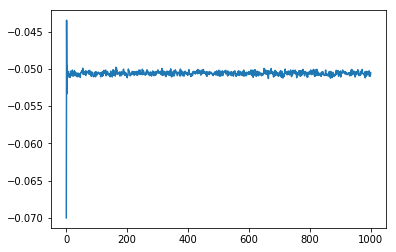

In [228]:
plt.plot(V_test)